In [44]:
import matplotlib.pyplot as plt
import re
import math

In [45]:
def get_data(file):
    # Returns sizes of cache, miss rates.
    block_sizes = []
    miss_rates = []
    with open(file, 'r') as f:
        for line in f:
            if "block_size" in line:
                beg = re.search(r"\d", line).start()
                end = line.index("B")
                block_sizes.append(math.log(int(line[beg:end]), 2))
            if "miss_rate" in line:
                beg = re.search(r"\d", line).start()
                miss_rates.append(float(line[beg:]))
    return block_sizes, miss_rates

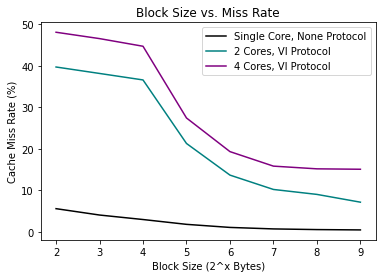

In [46]:
def get_miss_multi(file, core_number):
    cpu_accesses = []
    misses = []
    avg_miss_rates = []
    with open(file, 'r') as f:
        for line in f:
            if "n_cpu_accesses" in line:
                beg = re.search(r"\d", line).start()
                cpu_accesses.append(int(line[beg:]))
            if "n_misses" in line:
                beg = re.search(r"\d", line).start()
                misses.append(int(line[beg:]))
    for i in range (0, len(cpu_accesses), core_number):
        tmp1 = 0
        tmp2 = 0
        for j in range (0, core_number):
            tmp1 += cpu_accesses[i+j]
            tmp2 += misses[i+j]
        avg_miss_rates.append(round(tmp2/tmp1*100,2))
    return avg_miss_rates

def plot_miss(x, y, z, t):
    plt.plot(x, y, color='black', label="Single Core, None Protocol")
    plt.plot(x, z, color='teal', label="2 Cores, VI Protocol")
    plt.plot(x, t, color='purple', label="4 Cores, VI Protocol")
    plt.xlabel("Block Size (2^x Bytes)")
    plt.ylabel("Cache Miss Rate (%)")
    plt.title("Block Size vs. Miss Rate")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    block_sizes, miss_rates_1_core = get_data("log1core.txt")
    miss_rates_2_core = get_miss_multi("log2core.txt", 2)
    miss_rates_4_core = get_miss_multi("log4core.txt", 4)
    plot_miss(block_sizes, miss_rates_1_core, miss_rates_2_core, miss_rates_4_core)